###Importando as bibliotecas

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import calendar
%matplotlib inline

###Carregando dados processados da Staging Area

In [146]:
porto_df = pd.read_csv('/content/drive/MyDrive/Projeto-Integrador-III/Staging Area/porto.csv')

#Categorizando as colunas de variáveis qualitativas
for col in porto_df.columns:
    if col not in ['ano', 'mes','toneladas']:
        porto_df[f'{col}']=porto_df[f'{col}'].astype('category')


In [147]:
movimento_df = pd.read_csv('/content/drive/MyDrive/Projeto-Integrador-III/Staging Area/porto_ts.csv')
# Conversão de ano/mes em index
movimento_df['data'] = pd.to_datetime(movimento_df['ano'].astype(str) + '-' + movimento_df['mes'].astype(str), format='%Y-%m')
movimento_df = movimento_df.drop(['ano', 'mes'], axis=1)
data = movimento_df.pop('data')  # Remove a coluna e armazena em uma variável
movimento_df.insert(0, 'data', data)  # Insere a coluna na posição desejada
del data
movimento_df['data'] = pd.to_datetime(movimento_df['data'])


#Análises da Movimentação no Porto de Santos

###Matriz de gráficos de movimentação anual

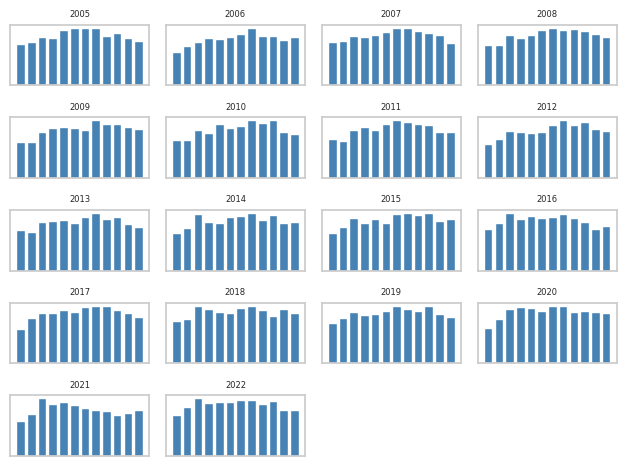

In [148]:
# Define a largura da matriz
largura_matriz = 4

# Calcula o número total de anos
total_anos = len(range(2005, 2023))

# Calcula o número total de linhas
total_linhas = (total_anos - 1) // largura_matriz + 1

# Loop pelos anos
for i, y in enumerate(range(2005, 2023)):
    filtro = (porto_df['ano'] == y)
    anual_df = porto_df[filtro]

    # Agrupar os dados por mês e ano e calcular a soma das toneladas
    dados_agrupados = anual_df.groupby(['ano', 'mes'])['toneladas'].sum().reset_index()

    # Configurar o índice do subplot
    indice_subplot = i + 1

    # Cria o subplot correspondente
    plt.subplot(total_linhas, largura_matriz, indice_subplot)

    # Criar o gráfico de barras
    plt.bar(dados_agrupados['mes'], dados_agrupados['toneladas'], color='steelblue')

    # Remover os valores dos eixos
    plt.xticks([])
    plt.yticks([])

    # Configurar o título do gráfico
    plt.title(f'{y}', fontsize=6)

# Ajustar o espaçamento entre subplots
plt.tight_layout(pad=1)

# Mostrar os gráficos
plt.show()

###Gráfico de Movimentação ano específico

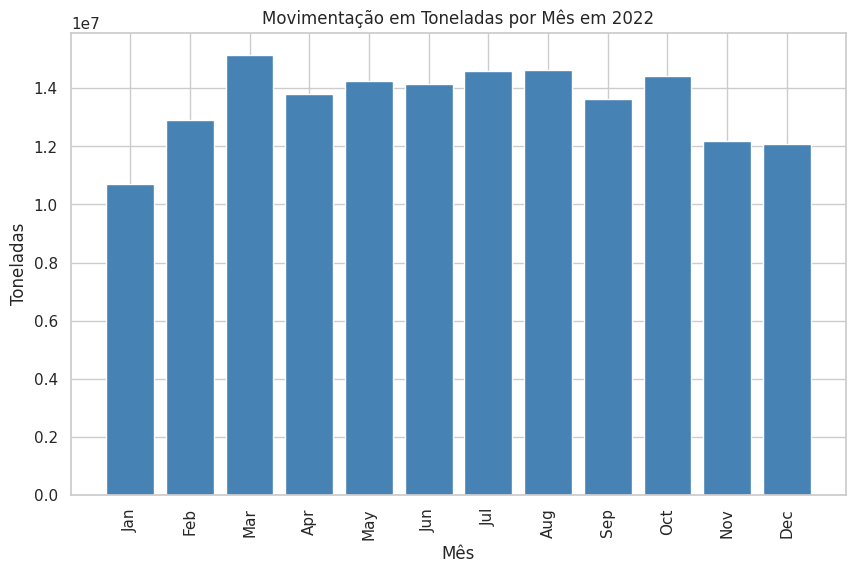

In [149]:
ano = 2022
filtro = (porto_df['ano'] == ano)
anual_df = porto_df[filtro]

# Agrupar os dados por mês e ano e calcular a soma das toneladas
dados_agrupados = anual_df.groupby(['ano', 'mes'])['toneladas'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(dados_agrupados['mes'], dados_agrupados['toneladas'], color='SteelBlue')

# Configurar os eixos e o título do gráfico
meses_abreviados = [calendar.month_abbr[mes] for mes in dados_agrupados['mes']]
plt.xticks(dados_agrupados['mes'], meses_abreviados, rotation='vertical')
plt.xlabel('Mês')
plt.ylabel('Toneladas')
plt.title(f'Movimentação em Toneladas por Mês em {ano}')

plt.show()

###Gráfico de calor toda movimentação

Mostra a tendência de alta da movimentação ao longo dos anos e de modo menos evidente a sazonalidade durante os meses do ano.

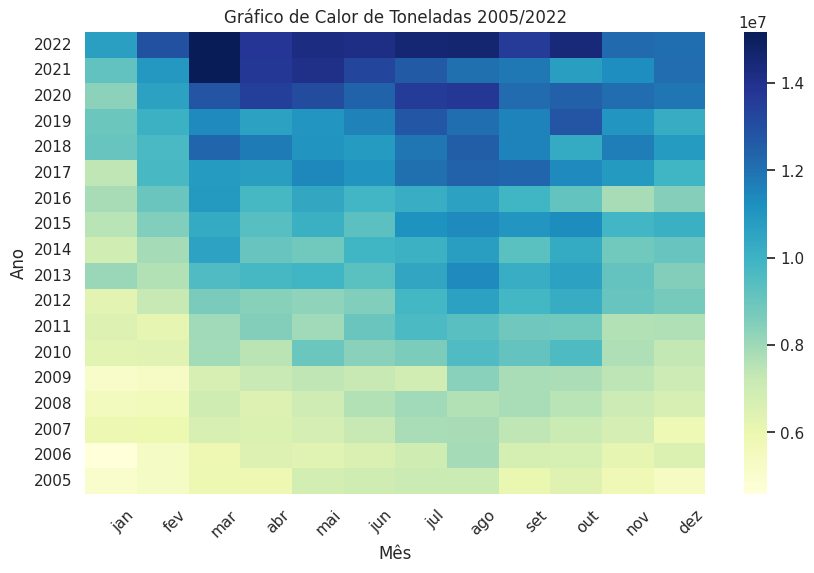

In [150]:
inicio = (2005, 1)
fim = (2022, 12)

filtro_periodo = ((porto_df['ano'] > inicio[0]) | ((porto_df['ano'] == inicio[0]) & (porto_df['mes'] >= inicio[1]))) & ((porto_df['ano'] < fim[0]) | ((porto_df['ano'] == fim[0]) & (porto_df['mes'] <= fim[1])))

dados_filtrados = porto_df[filtro_periodo]

tabela_pivot = dados_filtrados.pivot_table(values='toneladas', index='ano', columns='mes', aggfunc='sum')

plt.figure(figsize=(10, 6))  # Define o tamanho da figura
ax = sns.heatmap(tabela_pivot, cmap='YlGnBu', annot=False, fmt='g', cbar=True)

# Mapear os números dos meses para os nomes abreviados
meses_abreviados = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

# Configurar os rótulos dos meses
ax.set_xticks(range(1, 13))
ax.set_xticklabels(meses_abreviados, rotation=45, ha='right')

# Inverter a ordem dos anos no eixo y
ax.invert_yaxis()

plt.xlabel('Mês')
plt.ylabel('Ano')
plt.title(f'Gráfico de Calor de Toneladas {inicio[0]}/{fim[0]}')

# Mostrar o gráfico
plt.show()

###Analisando por **Carga**

####Classificando por movimentação

In [151]:
# Definir o período desejado
ano_inicial = 2022
ano_final = 2022

# Filtrar os dados pelo período desejado
carga_df = porto_df[(porto_df['ano'] >= ano_inicial) & (porto_df['ano'] <= ano_final)]

# Calcular a soma das toneladas para cada valor único do campo "carga" no período selecionado
soma_toneladas = carga_df.groupby('carga')['toneladas'].sum()

# Ordenar os valores com base na soma das toneladas em ordem decrescente
soma_toneladas_ordenado = soma_toneladas.sort_values(ascending=False)

# Criar uma lista numerada horizontalmente dos valores distintos do campo "carga" em ordem decrescente
for i, valor in enumerate(soma_toneladas_ordenado.index):
    total_toneladas = soma_toneladas_ordenado[valor]
    print(f"{i+1}º: {valor} - Total em Toneladas: {total_toneladas}")

1º: GRÃOS E FARELO - Total em Toneladas: 53768774
2º: OUTRAS MERCADORIAS - Total em Toneladas: 34947510
3º: AÇÚCAR - Total em Toneladas: 20340199
4º: PRODUTOS QUÍMICOS - Total em Toneladas: 9554876
5º: PETRÓLEO E DERIVADOS - Total em Toneladas: 9108983
6º: FERTILIZANTES - Total em Toneladas: 8615140
7º: CELULOSE - Total em Toneladas: 8259459
8º: SEM CARGAS - Total em Toneladas: 2721175
9º: SUCOS - Total em Toneladas: 2606210
10º: CARNES - Total em Toneladas: 2267912
11º: BUNKER (O.COMBUSTIVEL) - Total em Toneladas: 2014072
12º: ENXOFRE - Total em Toneladas: 1905908
13º: ETANOL - Total em Toneladas: 1846799
14º: PRODUTOS DA INDÚSTRIA QUÍMICA - Total em Toneladas: 1296623
15º: SAL - Total em Toneladas: 1265936
16º: VEÍCULOS - Total em Toneladas: 687315
17º: ÓLEO DE ORIGEM VEGETAL - Total em Toneladas: 664050
18º: GÁS DE PETRÓLEO - Total em Toneladas: 358841
19º: COMBUSTÍVEIS, ÓLEOS E PRODUTOS M - Total em Toneladas: 243802
20º: BUNKER (DIESEL) - Total em Toneladas: 15390
21º: CARVÃO - To

###Movimentação por Carga com Freq. Acumulada

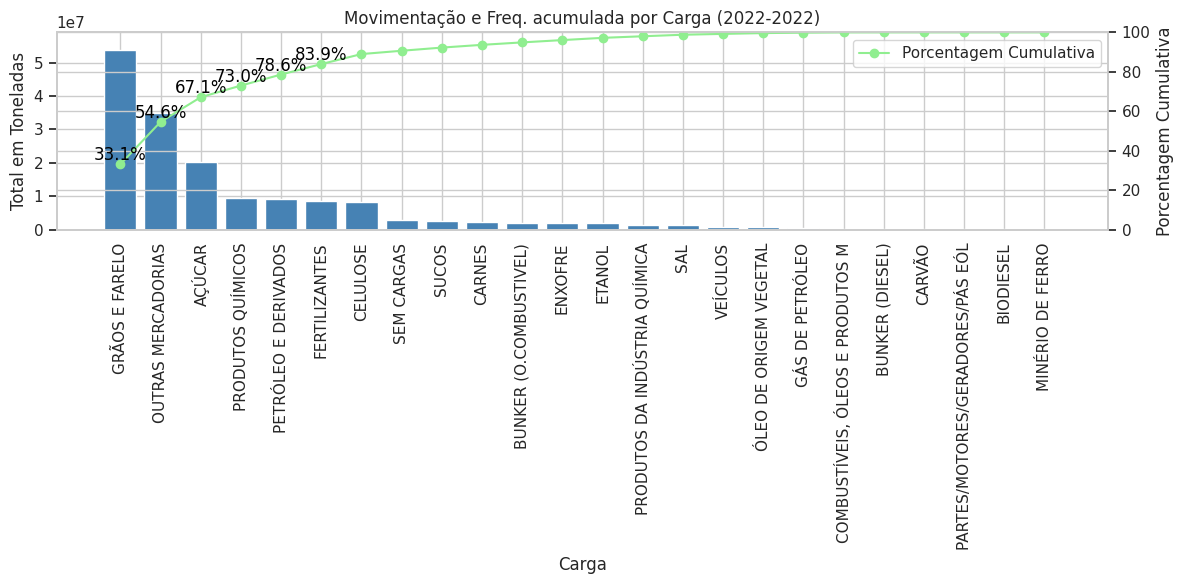

In [152]:
# Ordenar os valores em ordem decrescente
soma_toneladas_ordenado = soma_toneladas_ordenado.sort_values(ascending=False)

# Calcular a porcentagem cumulativa
porcentagem_cumulativa = soma_toneladas_ordenado.cumsum() / soma_toneladas_ordenado.sum() * 100

# Criar o gráfico de barras e o gráfico de linha da porcentagem cumulativa
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras
ax1.bar(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.values, color='steelblue')
ax1.set_xlabel('Carga')
ax1.set_ylabel('Total em Toneladas')
ax1.set_title(f'Movimentação e Freq. acumulada por Carga ({ano_inicial}-{ano_final})')

# Gráfico de linha da porcentagem cumulativa - freq
ax2 = ax1.twinx()
ax2.plot(range(len(soma_toneladas_ordenado)), porcentagem_cumulativa, color='lightgreen', marker='o')
ax2.set_ylabel('Porcentagem Cumulativa')

# Configurar os rótulos do eixo x
ax1.set_xticks(range(len(soma_toneladas_ordenado)))
ax1.set_xticklabels(soma_toneladas_ordenado.index, rotation='vertical')

# Configurar o limite do eixo y para o gráfico de barras
ax1.set_ylim(0, soma_toneladas_ordenado.max() * 1.1)

# Configurar o limite do eixo y para o gráfico de linha da porcentagem cumulativa
ax2.set_ylim(0, 100)
temp=0
# Adicionar as tags das porcentagens acumuladas até 90%
for i, porcentagem in enumerate(porcentagem_cumulativa):
    if porcentagem <= 80:
        ax2.annotate(f'{porcentagem:.1f}%', (i, porcentagem), ha='center', va='bottom', color='black')
        temp = i+1
    elif i == temp:
        ax2.annotate(f'{porcentagem:.1f}%', (i, porcentagem), ha='center', va='bottom', color='black')
    else:
        break

# Exibir a legenda
ax2.legend(['Porcentagem Cumulativa'], loc='upper right')

plt.tight_layout()
plt.show()

###Curva de movimentação 

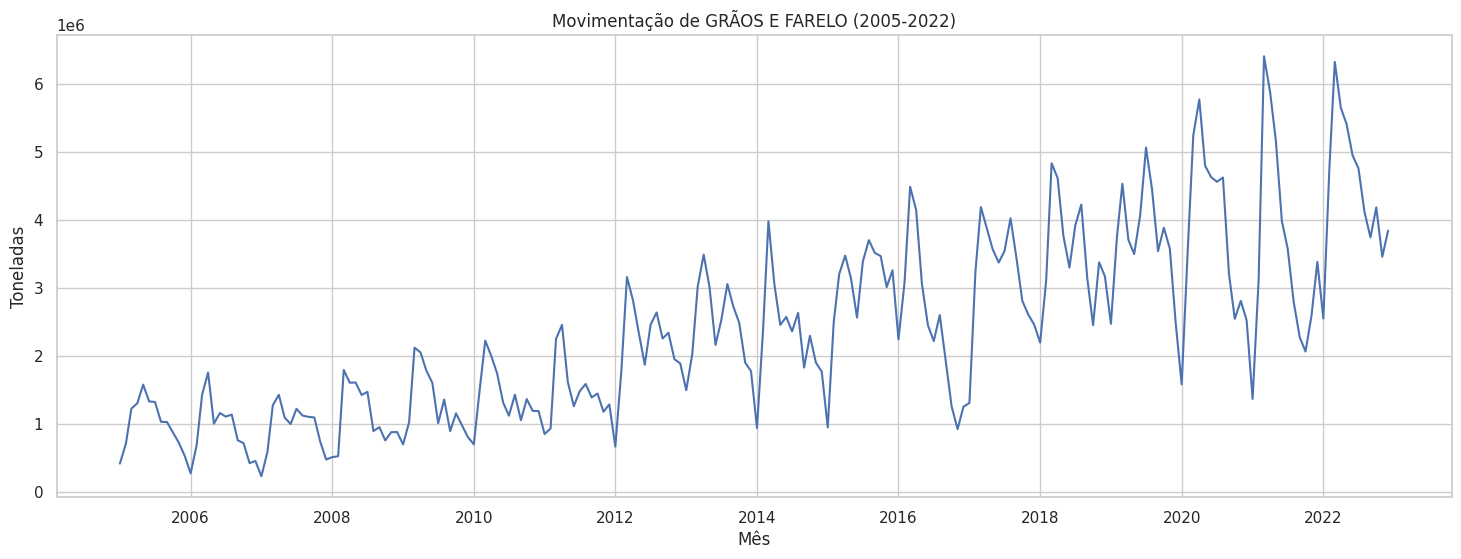

In [153]:
# Valor específico para o campo "carga" : GRÃOS E FARELO , AÇÚCAR , OUTRAS MERCADORIAS
valor_carga = 'GRÃOS E FARELO'
carga_df = porto_df.loc[porto_df['carga'] == valor_carga]

# Definir o período desejado
ano_inicial = 2005
ano_final = 2022

# Filtrar os dados pelo período desejado
carga_df = carga_df[(carga_df['ano'] >= ano_inicial) & (carga_df['ano'] <= ano_final)]

# Agrupar os dados por mês e ano e calcular a soma das toneladas
dados_agrupados = carga_df.groupby(['ano', 'mes'])['toneladas'].sum().reset_index()

dados_agrupados['data'] = pd.to_datetime(dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str), format='%Y-%m')
dados_agrupados = dados_agrupados.drop(['ano', 'mes'], axis=1)
data = dados_agrupados.pop('data')  # Remove a coluna e armazena em uma variável
dados_agrupados.insert(0, 'data', data)  # Insere a coluna na posição desejada
del data

# Conversão de ano/mes em index
dados_agrupados['data'] = pd.to_datetime(dados_agrupados['data'])
dados_agrupados.set_index('data', inplace=True)

# Criar o gráfico em linha
sns.set(style='whitegrid')
plt.figure(figsize=(18, 6))  # Define o tamanho da figura
plt.plot(dados_agrupados['toneladas'])

# Configurar os rótulos do eixo x e o título do gráfico
#meses_anos = [f"{calendar.month_abbr[mes]} / {ano}" for mes, ano in zip(dados_agrupados['mes'], dados_agrupados['ano'])]
#plt.xticks(range(len(meses_anos)), meses_anos, rotation='vertical')
plt.xlabel('Mês')
plt.ylabel('Toneladas')
plt.title(f'Movimentação de {valor_carga} ({ano_inicial}-{ano_final})')

plt.show()

###Analisando por **Berço**

####Classificando pela movimentação

In [154]:
# Definir o período desejado
ano_inicial = 2022
ano_final = 2022

# Filtrar os dados pelo período desejado
berco_df = porto_df[(porto_df['ano'] >= ano_inicial) & (porto_df['ano'] <= ano_final)]

# Calcular a soma das toneladas para cada valor único do campo "carga" no período selecionado
soma_toneladas = berco_df.groupby('berco')['toneladas'].sum()

# Ordenar os valores com base na soma das toneladas em ordem decrescente
soma_toneladas_ordenado = soma_toneladas.sort_values(ascending=False)

# Criar uma lista numerada horizontalmente dos valores distintos do campo "carga" em ordem decrescente
for i, valor in enumerate(soma_toneladas_ordenado.index):
    total_toneladas = soma_toneladas_ordenado[valor]
    print(f"{i+1}º: {valor} - Total em Toneladas: {total_toneladas}")

1º: TGG - Total em Toneladas: 8789478
2º: TECON 3 - Total em Toneladas: 8539250
3º: ARM 20/21 - Total em Toneladas: 7668714
4º: BTP 2 - Total em Toneladas: 7658178
5º: TECON 2 - Total em Toneladas: 7131663
6º: BTP 1 - Total em Toneladas: 7113337
7º: ARM 16/17 - Total em Toneladas: 6573170
8º: ARM 19 - Total em Toneladas: 6232672
9º: BTP 3 - Total em Toneladas: 6164870
10º: ARM 39 - Total em Toneladas: 6107928
11º: DP WORLD 2 - Total em Toneladas: 5399765
12º: TEG - Total em Toneladas: 5045536
13º: ARM 37 - Total em Toneladas: 5009468
14º: DP WORLD 1 - Total em Toneladas: 4795666
15º: ARM 38 - Total em Toneladas: 4457548
16º: TIPLAM 2 - Total em Toneladas: 4256587
17º: ALAMOA 1 - Total em Toneladas: 4006265
18º: TECON 1 - Total em Toneladas: 3905194
19º: TIPLAM 3 - Total em Toneladas: 3846203
20º: OUTEIRINHOS 3 - Total em Toneladas: 3584241
21º: ARM 12A - Total em Toneladas: 3410039
22º: ALAMOA 2 - Total em Toneladas: 3345530
23º: TERMAG - Total em Toneladas: 3209364
24º: TEAG - Total e

####Movimentação por Berço com freq. acumulada

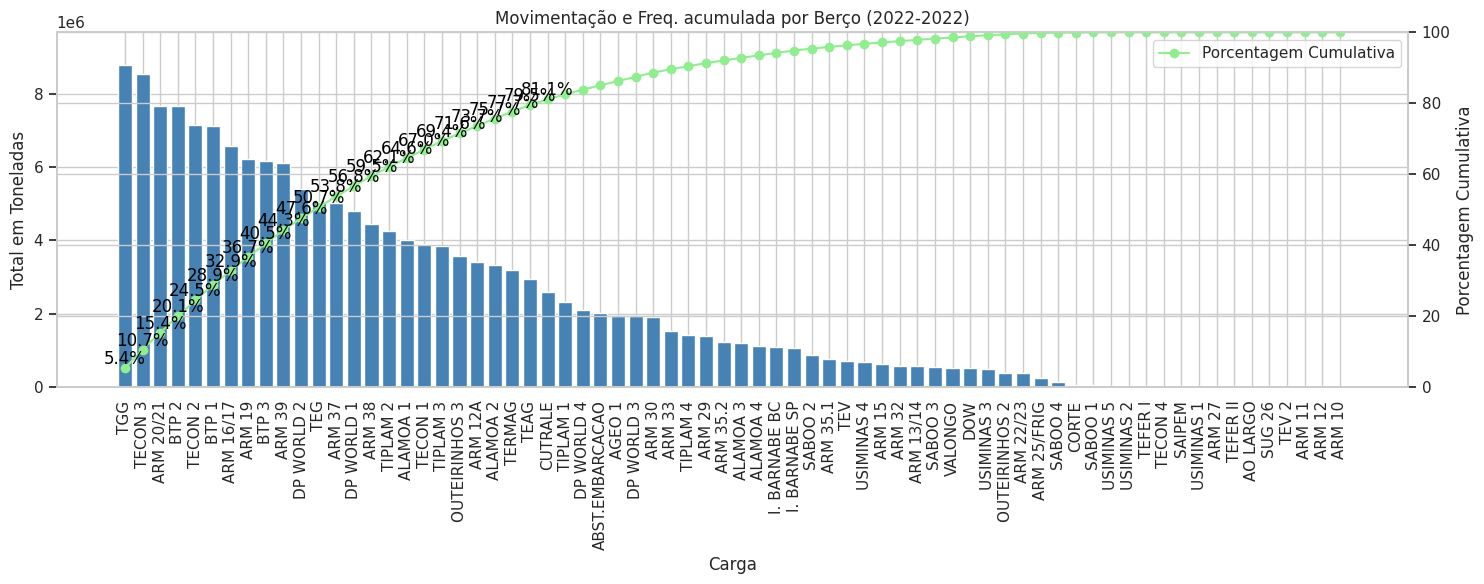

In [155]:
# Ordenar os valores em ordem decrescente
soma_toneladas_ordenado = soma_toneladas_ordenado.sort_values(ascending=False)

# Calcular a porcentagem cumulativa
porcentagem_cumulativa = soma_toneladas_ordenado.cumsum() / soma_toneladas_ordenado.sum() * 100

# Criar o gráfico de barras e o gráfico de linha da porcentagem cumulativa
fig, ax1 = plt.subplots(figsize=(15, 6))

# Gráfico de barras
ax1.bar(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.values, color='steelblue')
ax1.set_xlabel('Carga')
ax1.set_ylabel('Total em Toneladas')
ax1.set_title(f'Movimentação e Freq. acumulada por Berço ({ano_inicial}-{ano_final})')

# Gráfico de linha da porcentagem cumulativa - freq
ax2 = ax1.twinx()
ax2.plot(range(len(soma_toneladas_ordenado)), porcentagem_cumulativa, color='lightgreen', marker='o')
ax2.set_ylabel('Porcentagem Cumulativa')

# Configurar os rótulos do eixo x
ax1.set_xticks(range(len(soma_toneladas_ordenado)))
ax1.set_xticklabels(soma_toneladas_ordenado.index, rotation='vertical')

# Configurar o limite do eixo y para o gráfico de barras
ax1.set_ylim(0, soma_toneladas_ordenado.max() * 1.1)

# Configurar o limite do eixo y para o gráfico de linha da porcentagem cumulativa
ax2.set_ylim(0, 100)
temp=0
# Adicionar as tags das porcentagens acumuladas até 90%
for i, porcentagem in enumerate(porcentagem_cumulativa):
    if porcentagem <= 80:
        ax2.annotate(f'{porcentagem:.1f}%', (i, porcentagem), ha='center', va='bottom', color='black')
        temp = i+1
    elif i == temp:
        ax2.annotate(f'{porcentagem:.1f}%', (i, porcentagem), ha='center', va='bottom', color='black')
    else:
        break

# Exibir a legenda
ax2.legend(['Porcentagem Cumulativa'], loc='upper right')

plt.tight_layout()
plt.show()

####Curva de movimentação 

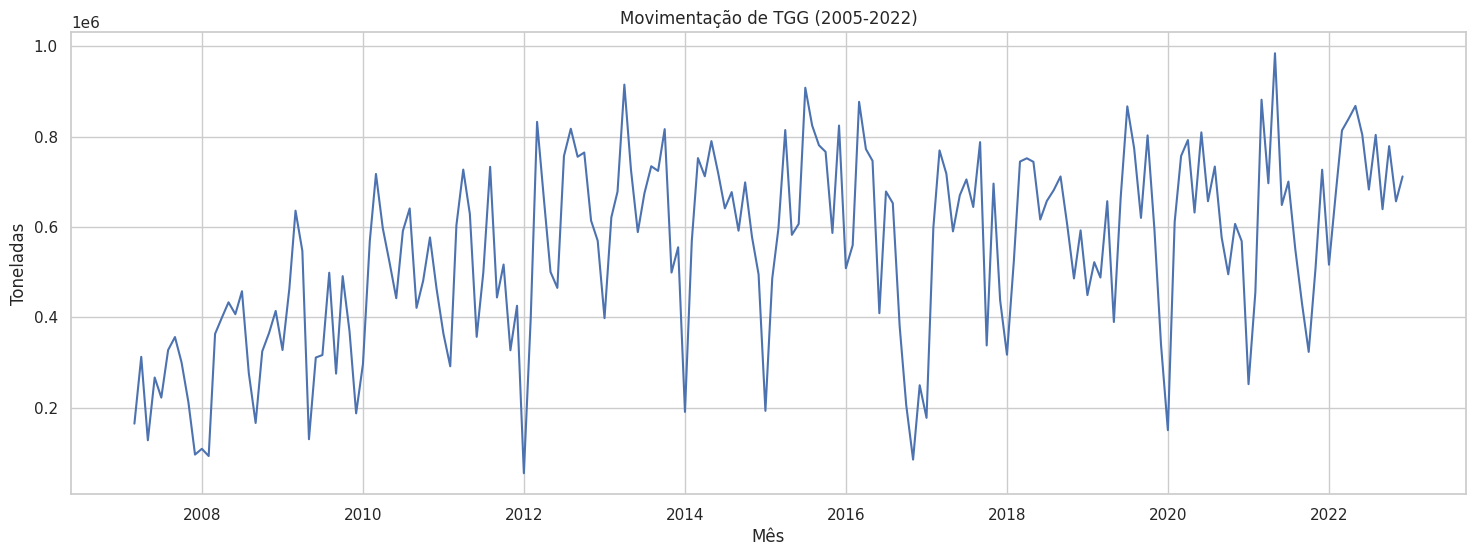

In [156]:
# Valor específico para o campo "berco" : TECON 3 , TGG , TECON 2, TEG
berco = 'TGG'
berco_df = porto_df.loc[porto_df['berco'] == berco]

# Definir o período desejado
ano_inicial = 2005
ano_final = 2022

# Filtrar os dados pelo período desejado
berco_df = berco_df[(berco_df['ano'] >= ano_inicial) & (berco_df['ano'] <= ano_final)]

# Agrupar os dados por mês e ano e calcular a soma das toneladas
dados_agrupados = berco_df.groupby(['ano', 'mes'])['toneladas'].sum().reset_index()

# Conversão de ano/mes em index
dados_agrupados['data'] = pd.to_datetime(dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str), format='%Y-%m')
dados_agrupados = dados_agrupados.drop(['ano', 'mes'], axis=1)
data = dados_agrupados.pop('data')  # Remove a coluna e armazena em uma variável
dados_agrupados.insert(0, 'data', data)  # Insere a coluna na posição desejada
del data

dados_agrupados['data'] = pd.to_datetime(dados_agrupados['data'])
dados_agrupados.set_index('data', inplace=True)

# Criar o gráfico em linha
sns.set(style='whitegrid')
plt.figure(figsize=(18, 6))  # Define o tamanho da figura
plt.plot(dados_agrupados['toneladas'])

# Configurar os rótulos do eixo x e o título do gráfico
#meses_anos = [f"{calendar.month_abbr[mes]} / {ano}" for mes, ano in zip(dados_agrupados['mes'], dados_agrupados['ano'])]
#plt.xticks(range(len(meses_anos)), meses_anos, rotation='vertical')
plt.xlabel('Mês')
plt.ylabel('Toneladas')
plt.title(f'Movimentação de {berco} ({ano_inicial}-{ano_final})')

plt.show()

###Movimentação conforme o tipo de **Navegação**

In [157]:
## Definir o período desejado
ano_inicial = 2022
ano_final = 2022

# Filtrar os dados pelo período desejado
navegacao_df = porto_df[(porto_df['ano'] >= ano_inicial) & (porto_df['ano'] <= ano_final)]

# Calcular a soma das toneladas para cada valor único do campo "carga" no período selecionado
soma_toneladas = navegacao_df.groupby('navegacao')['toneladas'].sum()

# Ordenar os valores com base na soma das toneladas em ordem decrescente
soma_toneladas_ordenado = soma_toneladas.sort_values(ascending=False)

# Criar uma lista numerada horizontalmente dos valores distintos do campo "carga" em ordem decrescente
for i, valor in enumerate(soma_toneladas_ordenado.index):
    total_toneladas = soma_toneladas_ordenado[valor]
    print(f"{i+1}º: {valor} - Total em Toneladas: {total_toneladas}")

1º: LONGO CURSO - Total em Toneladas: 144483400
2º: CABOTAGEM - Total em Toneladas: 18015908


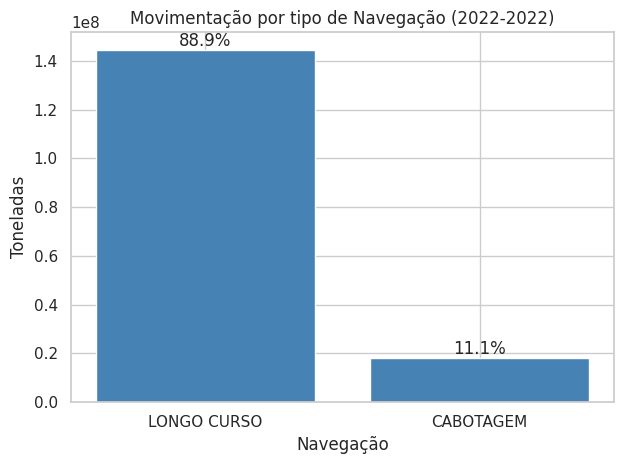

In [158]:
# Criar o gráfico de barras
plt.bar(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.values, color='steelblue')

# Configurar os rótulos do eixo x e o título do gráfico
plt.xticks(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.index)
plt.xlabel('Navegação')
plt.ylabel('Toneladas')
plt.title(f'Movimentação por tipo de Navegação ({ano_inicial}-{ano_final})')

# Adicionar rótulos com as porcentagens
for i, valor in enumerate(soma_toneladas_ordenado.values):
    porcentagem = f'{(valor / soma_toneladas_ordenado.sum())*100:.1f}%'
    plt.text(i, valor, porcentagem, ha='center', va='bottom')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

###Movimentação conforme o **Sentido da Carga**

In [159]:
## Definir o período desejado
ano_inicial = 2022
ano_final = 2022

# Filtrar os dados pelo período desejado
sentido_df = porto_df[(porto_df['ano'] >= ano_inicial) & (porto_df['ano'] <= ano_final)]

# Calcular a soma das toneladas para cada valor único do campo "carga" no período selecionado
soma_toneladas = sentido_df.groupby('sentido')['toneladas'].sum()

# Ordenar os valores com base na soma das toneladas em ordem decrescente
soma_toneladas_ordenado = soma_toneladas.sort_values(ascending=False)

# Criar uma lista numerada horizontalmente dos valores distintos do campo "carga" em ordem decrescente
for i, valor in enumerate(soma_toneladas_ordenado.index):
    total_toneladas = soma_toneladas_ordenado[valor]
    print(f"{i+1}º: {valor} - Total em Toneladas: {total_toneladas}")

1º: EMBARQUE - Total em Toneladas: 118651102
2º: DESEMBARQUE - Total em Toneladas: 43843842
3º: MOVIMENTO A BORDO - Total em Toneladas: 4364


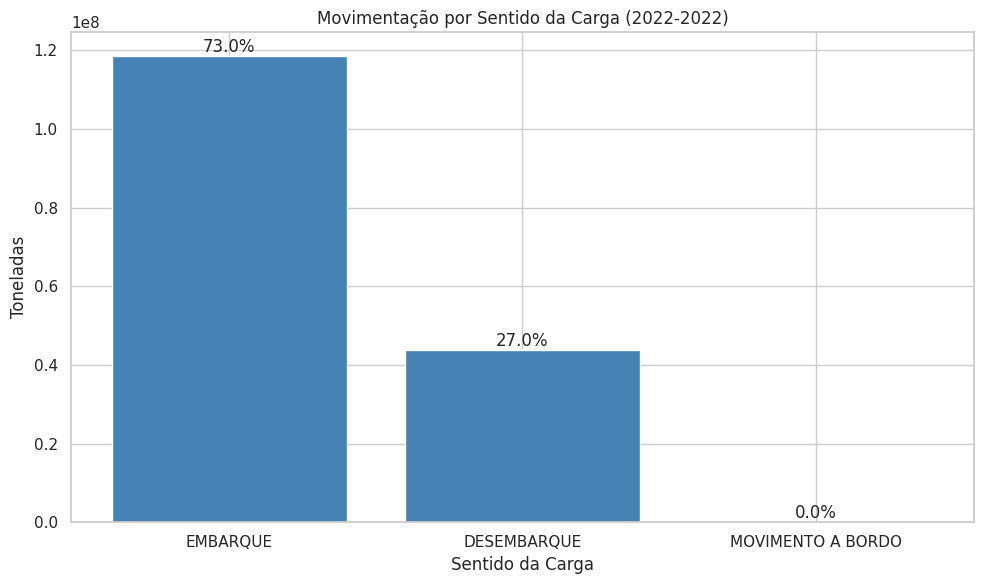

In [160]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.values, color='steelblue')

# Configurar os rótulos do eixo x e o título do gráfico
plt.xticks(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.index)
plt.xlabel('Sentido da Carga')
plt.ylabel('Toneladas')
plt.title(f'Movimentação por Sentido da Carga ({ano_inicial}-{ano_final})')

# Adicionar rótulos com as porcentagens
for i, valor in enumerate(soma_toneladas_ordenado.values):
    porcentagem = f'{(valor / soma_toneladas_ordenado.sum())*100:.1f}%'
    plt.text(i, valor, porcentagem, ha='center', va='bottom')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

###Movimentação pelo Perfil de Carga

In [161]:
## Definir o período desejado
ano_inicial = 2022
ano_final = 2022

# Filtrar os dados pelo período desejado
perfil_df = porto_df[(porto_df['ano'] >= ano_inicial) & (porto_df['ano'] <= ano_final)]

# Calcular a soma das toneladas para cada valor único do campo "carga" no período selecionado
soma_toneladas = perfil_df.groupby('perfil')['toneladas'].sum()

# Ordenar os valores com base na soma das toneladas em ordem decrescente
soma_toneladas_ordenado = soma_toneladas.sort_values(ascending=False)

# Criar uma lista numerada horizontalmente dos valores distintos do campo "carga" em ordem decrescente
for i, valor in enumerate(soma_toneladas_ordenado.index):
    total_toneladas = soma_toneladas_ordenado[valor]
    print(f"{i+1}º: {valor} - Total em Toneladas: {total_toneladas}")

1º: GRANEL SOLIDO - Total em Toneladas: 82256467
2º: CARGA CONTEINERIZADA - Total em Toneladas: 51580520
3º: GRANEL LIQUIDO - Total em Toneladas: 18973908
4º: CARGA GERAL - Total em Toneladas: 9688413


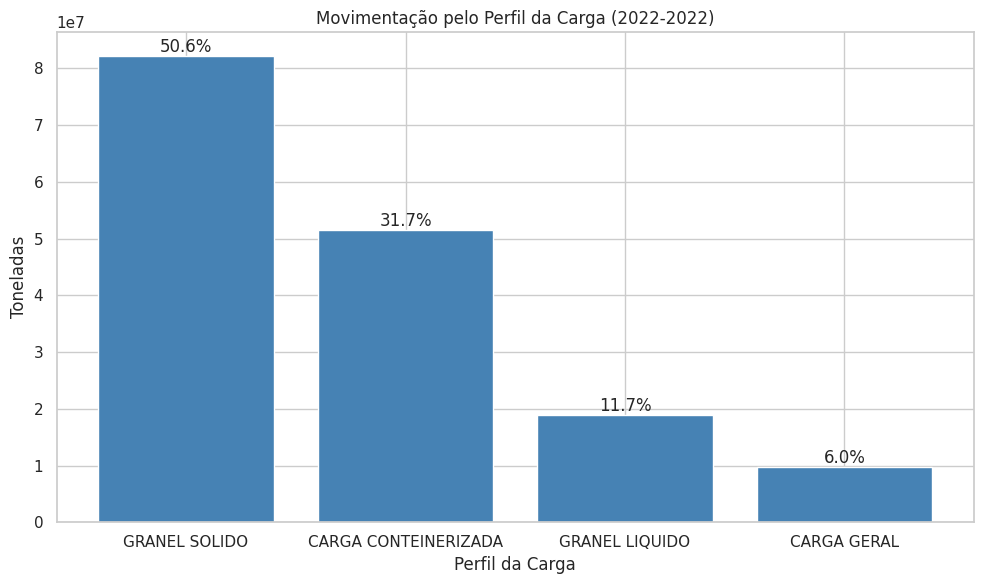

In [162]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.values, color='steelblue')

# Configurar os rótulos do eixo x e o título do gráfico
plt.xticks(range(len(soma_toneladas_ordenado)), soma_toneladas_ordenado.index)
plt.xlabel('Perfil da Carga')
plt.ylabel('Toneladas')
plt.title(f'Movimentação pelo Perfil da Carga ({ano_inicial}-{ano_final})')

# Adicionar rótulos com as porcentagens
for i, valor in enumerate(soma_toneladas_ordenado.values):
    porcentagem = f'{(valor / soma_toneladas_ordenado.sum())*100:.1f}%'
    plt.text(i, valor, porcentagem, ha='center', va='bottom')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

###Séries Temporais da Movimentação do Porto e Cargas mais significativas

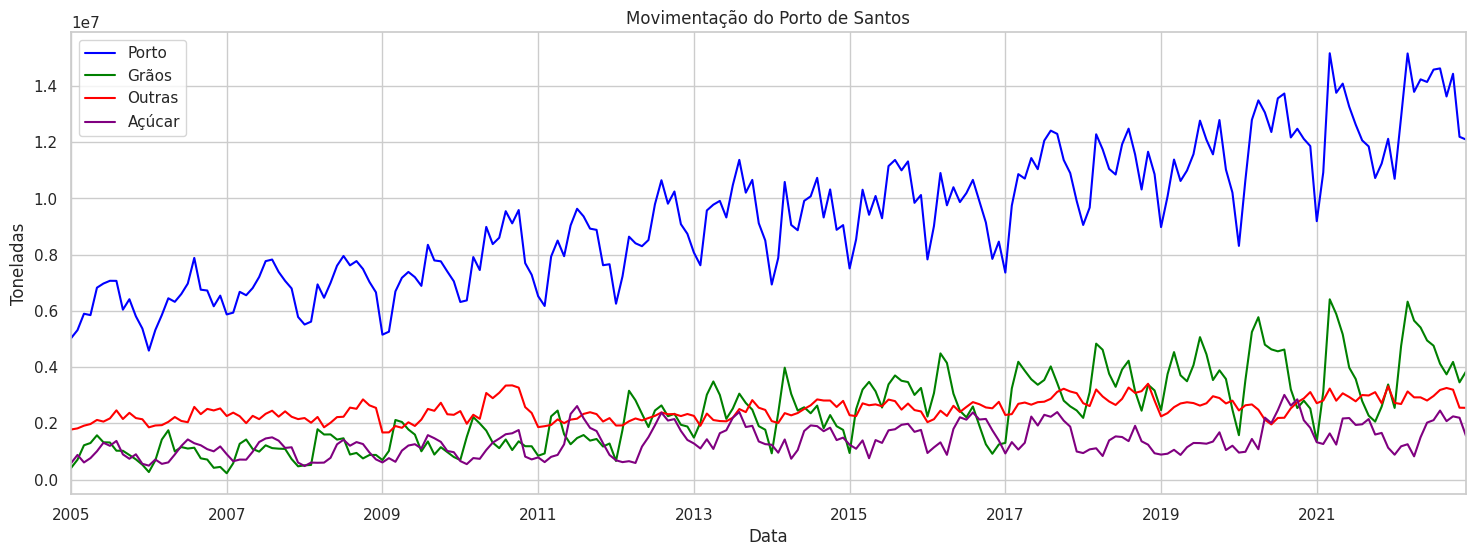

In [163]:
#Indexando a data
movimento2_df = movimento_df.set_index('data')

# Definir as cores desejadas
colors = ['blue', 'green', 'red', 'purple']
legenda = ['Porto', 'Grãos', 'Outras', 'Açúcar']
# Definir o estilo do seaborn
sns.set(style='whitegrid')

# Plotar a série temporal com grid
fig, ax = plt.subplots(figsize=(18, 6))
movimento2_df.plot(ax=ax, color=colors)

# Configurar os rótulos e título
ax.set_xlabel('Data')
ax.set_ylabel('Toneladas')
ax.set_title('Movimentação do Porto de Santos')

# Adicionar grid
ax.grid(True)
# Adicionar as legendas
plt.legend(legenda)

# Mostrar o gráfico
plt.show()

### Séries temporáis separadas

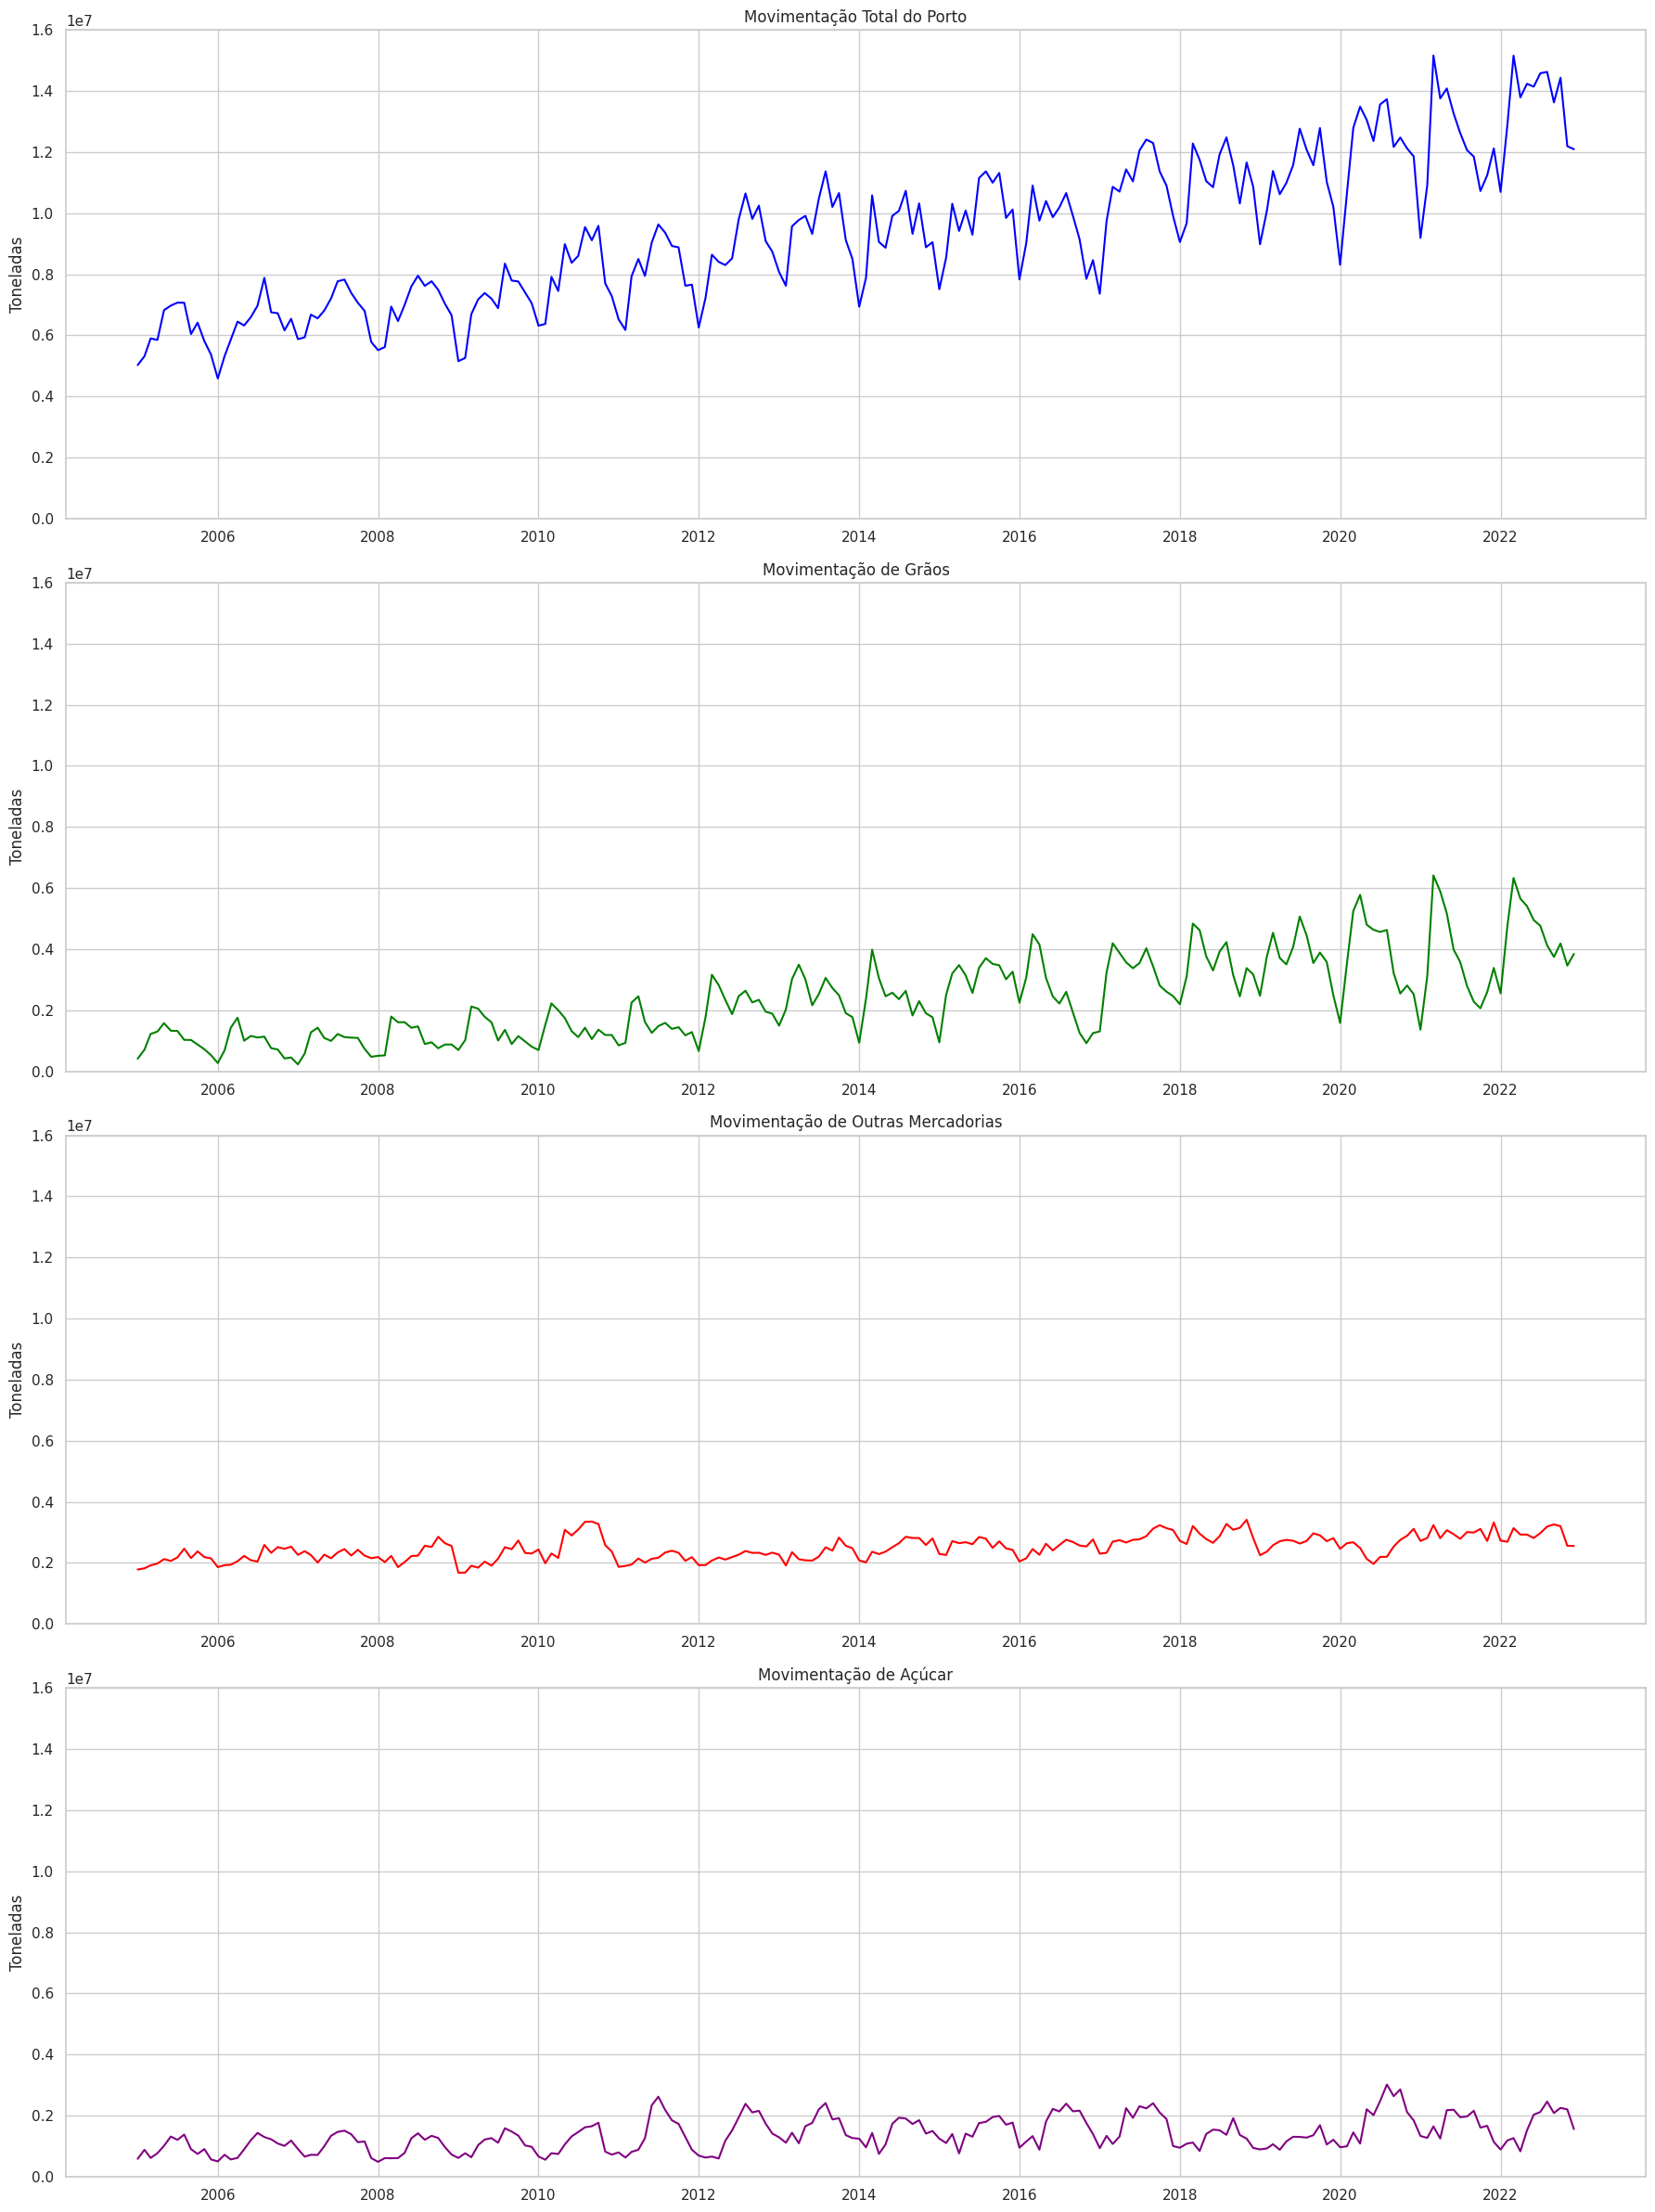

In [164]:
# Definir a escala desejada para o eixo y
y_scale = (0, 16000000)

# Plotar cada variável em relação ao índice (data)
fig, axs = plt.subplots(4, 1, figsize=(18, 24))

# Movimentação Total do Porto
axs[0].plot(movimento2_df.porto, color='blue')
axs[0].set_ylabel('Toneladas')
axs[0].set_title('Movimentação Total do Porto')
axs[0].set_ylim(y_scale)

# Movimentação de Grãos
axs[1].plot(movimento2_df.graos, color='green')
axs[1].set_ylabel('Toneladas')
axs[1].set_title('Movimentação de Grãos')
axs[1].set_ylim(y_scale)

# Movimentação de Outras Mercadorias
axs[2].plot(movimento2_df.outras, color='red')
axs[2].set_ylabel('Toneladas')
axs[2].set_title('Movimentação de Outras Mercadorias')
axs[2].set_ylim(y_scale)

# Movimentação de Açúcar
axs[3].plot(movimento2_df.sugar, color='purple')
axs[3].set_ylabel('Toneladas')
axs[3].set_title('Movimentação de Açúcar')
axs[3].set_ylim(y_scale)

# Adicionar grid
ax.grid(True)
plt.tight_layout()
plt.show()

###Curvas de Tendência
Expor a tendência da série temporal removendo a sazonalidade, fazendo uso da técnica das médias móveis

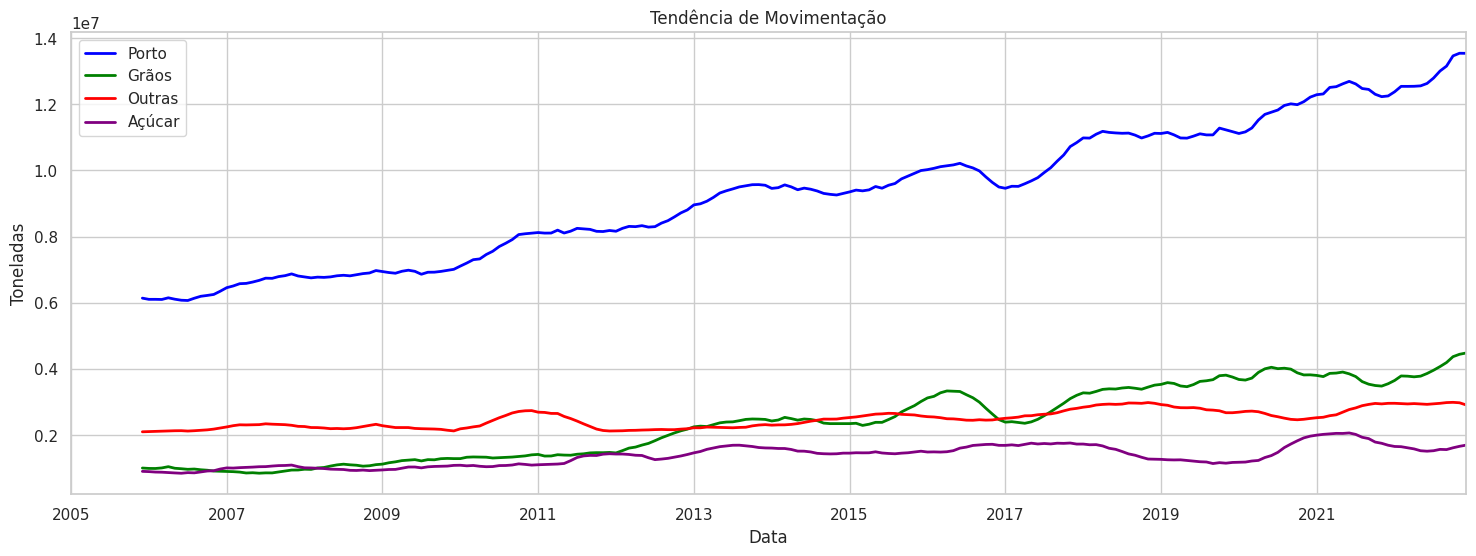

In [165]:
# Criando df para as médias móveis
medmov_df = movimento_df[['data']].copy()

#Período de duração da sazonalidade - tamanho da janela das médias móveis
window = 12

medmov_df['media_movel_porto'] = movimento_df.porto.rolling(window).mean()
medmov_df['media_movel_graos'] = movimento_df.graos.rolling(window).mean()
medmov_df['media_movel_outras'] = movimento_df.outras.rolling(window).mean()
medmov_df['media_movel_sugar'] = movimento_df.sugar.rolling(window).mean()

#Indexando a data
medmov_df = medmov_df.set_index('data')
# Definir as legendas
legenda = ['Porto', 'Grãos', 'Outras', 'Açúcar']

# Definir o estilo do seaborn
sns.set(style='whitegrid')

# Plotar a série temporal com grid
fig, ax = plt.subplots(figsize=(18, 6))
medmov_df['media_movel_porto'].plot(ax=ax, color='blue', linewidth=2, label='Porto')
medmov_df['media_movel_graos'].plot(ax=ax, color='green', linewidth=2, label='Grãos e Farelo')
medmov_df['media_movel_outras'].plot(ax=ax, color='red', linewidth=2, label='Outras Mercadorias')
medmov_df['media_movel_sugar'].plot(ax=ax, color='purple', linewidth=2, label='Açúcar')

# Configurar os rótulos e título
ax.set_xlabel('Data')
ax.set_ylabel('Toneladas')
ax.set_title('Tendência de Movimentação')
ax.grid(True)
ax.legend(legenda)
plt.show()

####Curvas Movimentação x Tendência

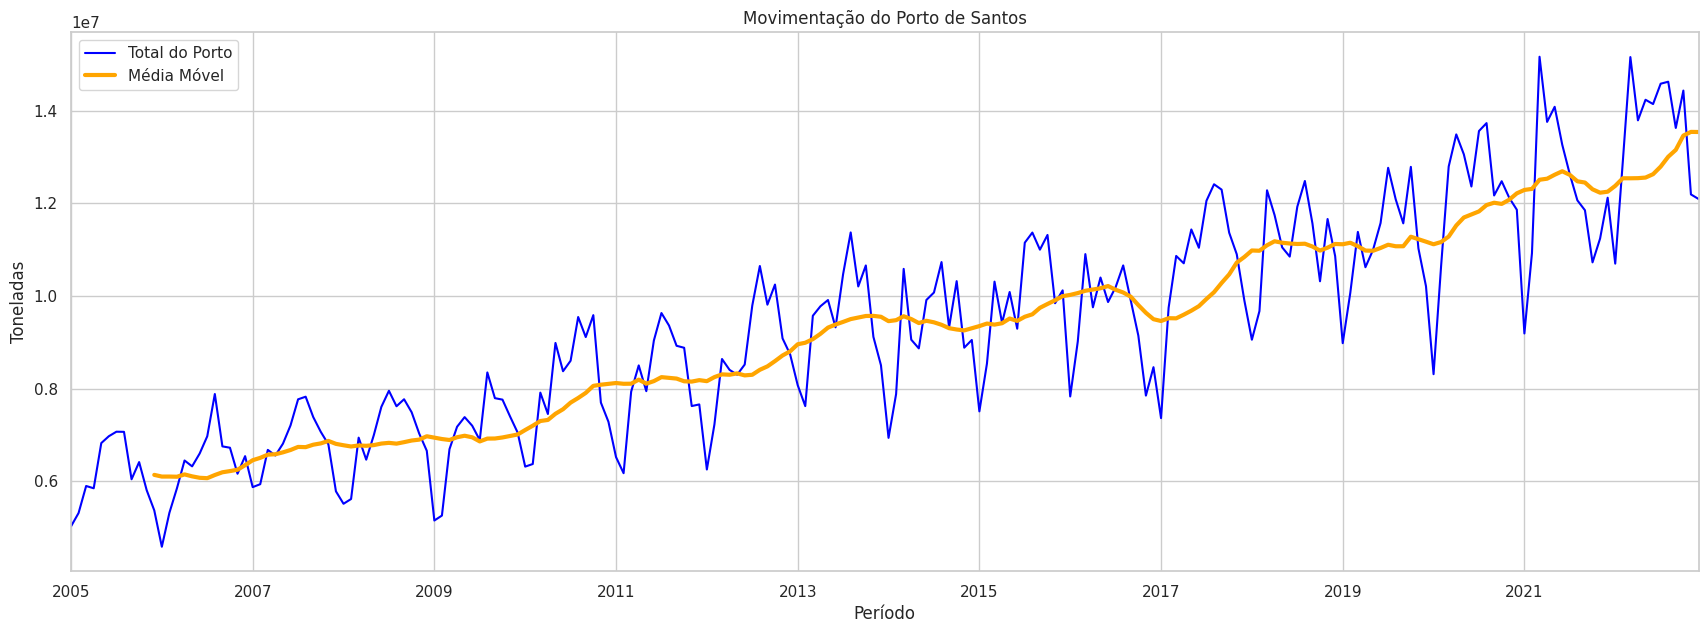

In [166]:
# Definir o estilo do seaborn
sns.set(style='whitegrid')

# Plotar a série temporal com a média móvel
fig, ax = plt.subplots(figsize=(21, 7))
movimento2_df.porto.plot(ax=ax, color='blue', label='Total do Porto')                            #porto, graos, outras, sugar
medmov_df['media_movel_porto'].plot(ax=ax, color='orange', linewidth=3 ,label='Média Móvel')    #porto, graos, outras, sugar

# Configurar os rótulos e título
ax.set_xlabel('Período')
ax.set_ylabel('Toneladas')
ax.set_title('Movimentação do Porto de Santos')

# Adicionar grid
ax.grid(True)

# Mostrar a legenda
ax.legend()

# Mostrar o gráfico
plt.show()

###Analisando a Sazonalidade pelas diferenças sucessivas
- extraímos a componente tendência da curva

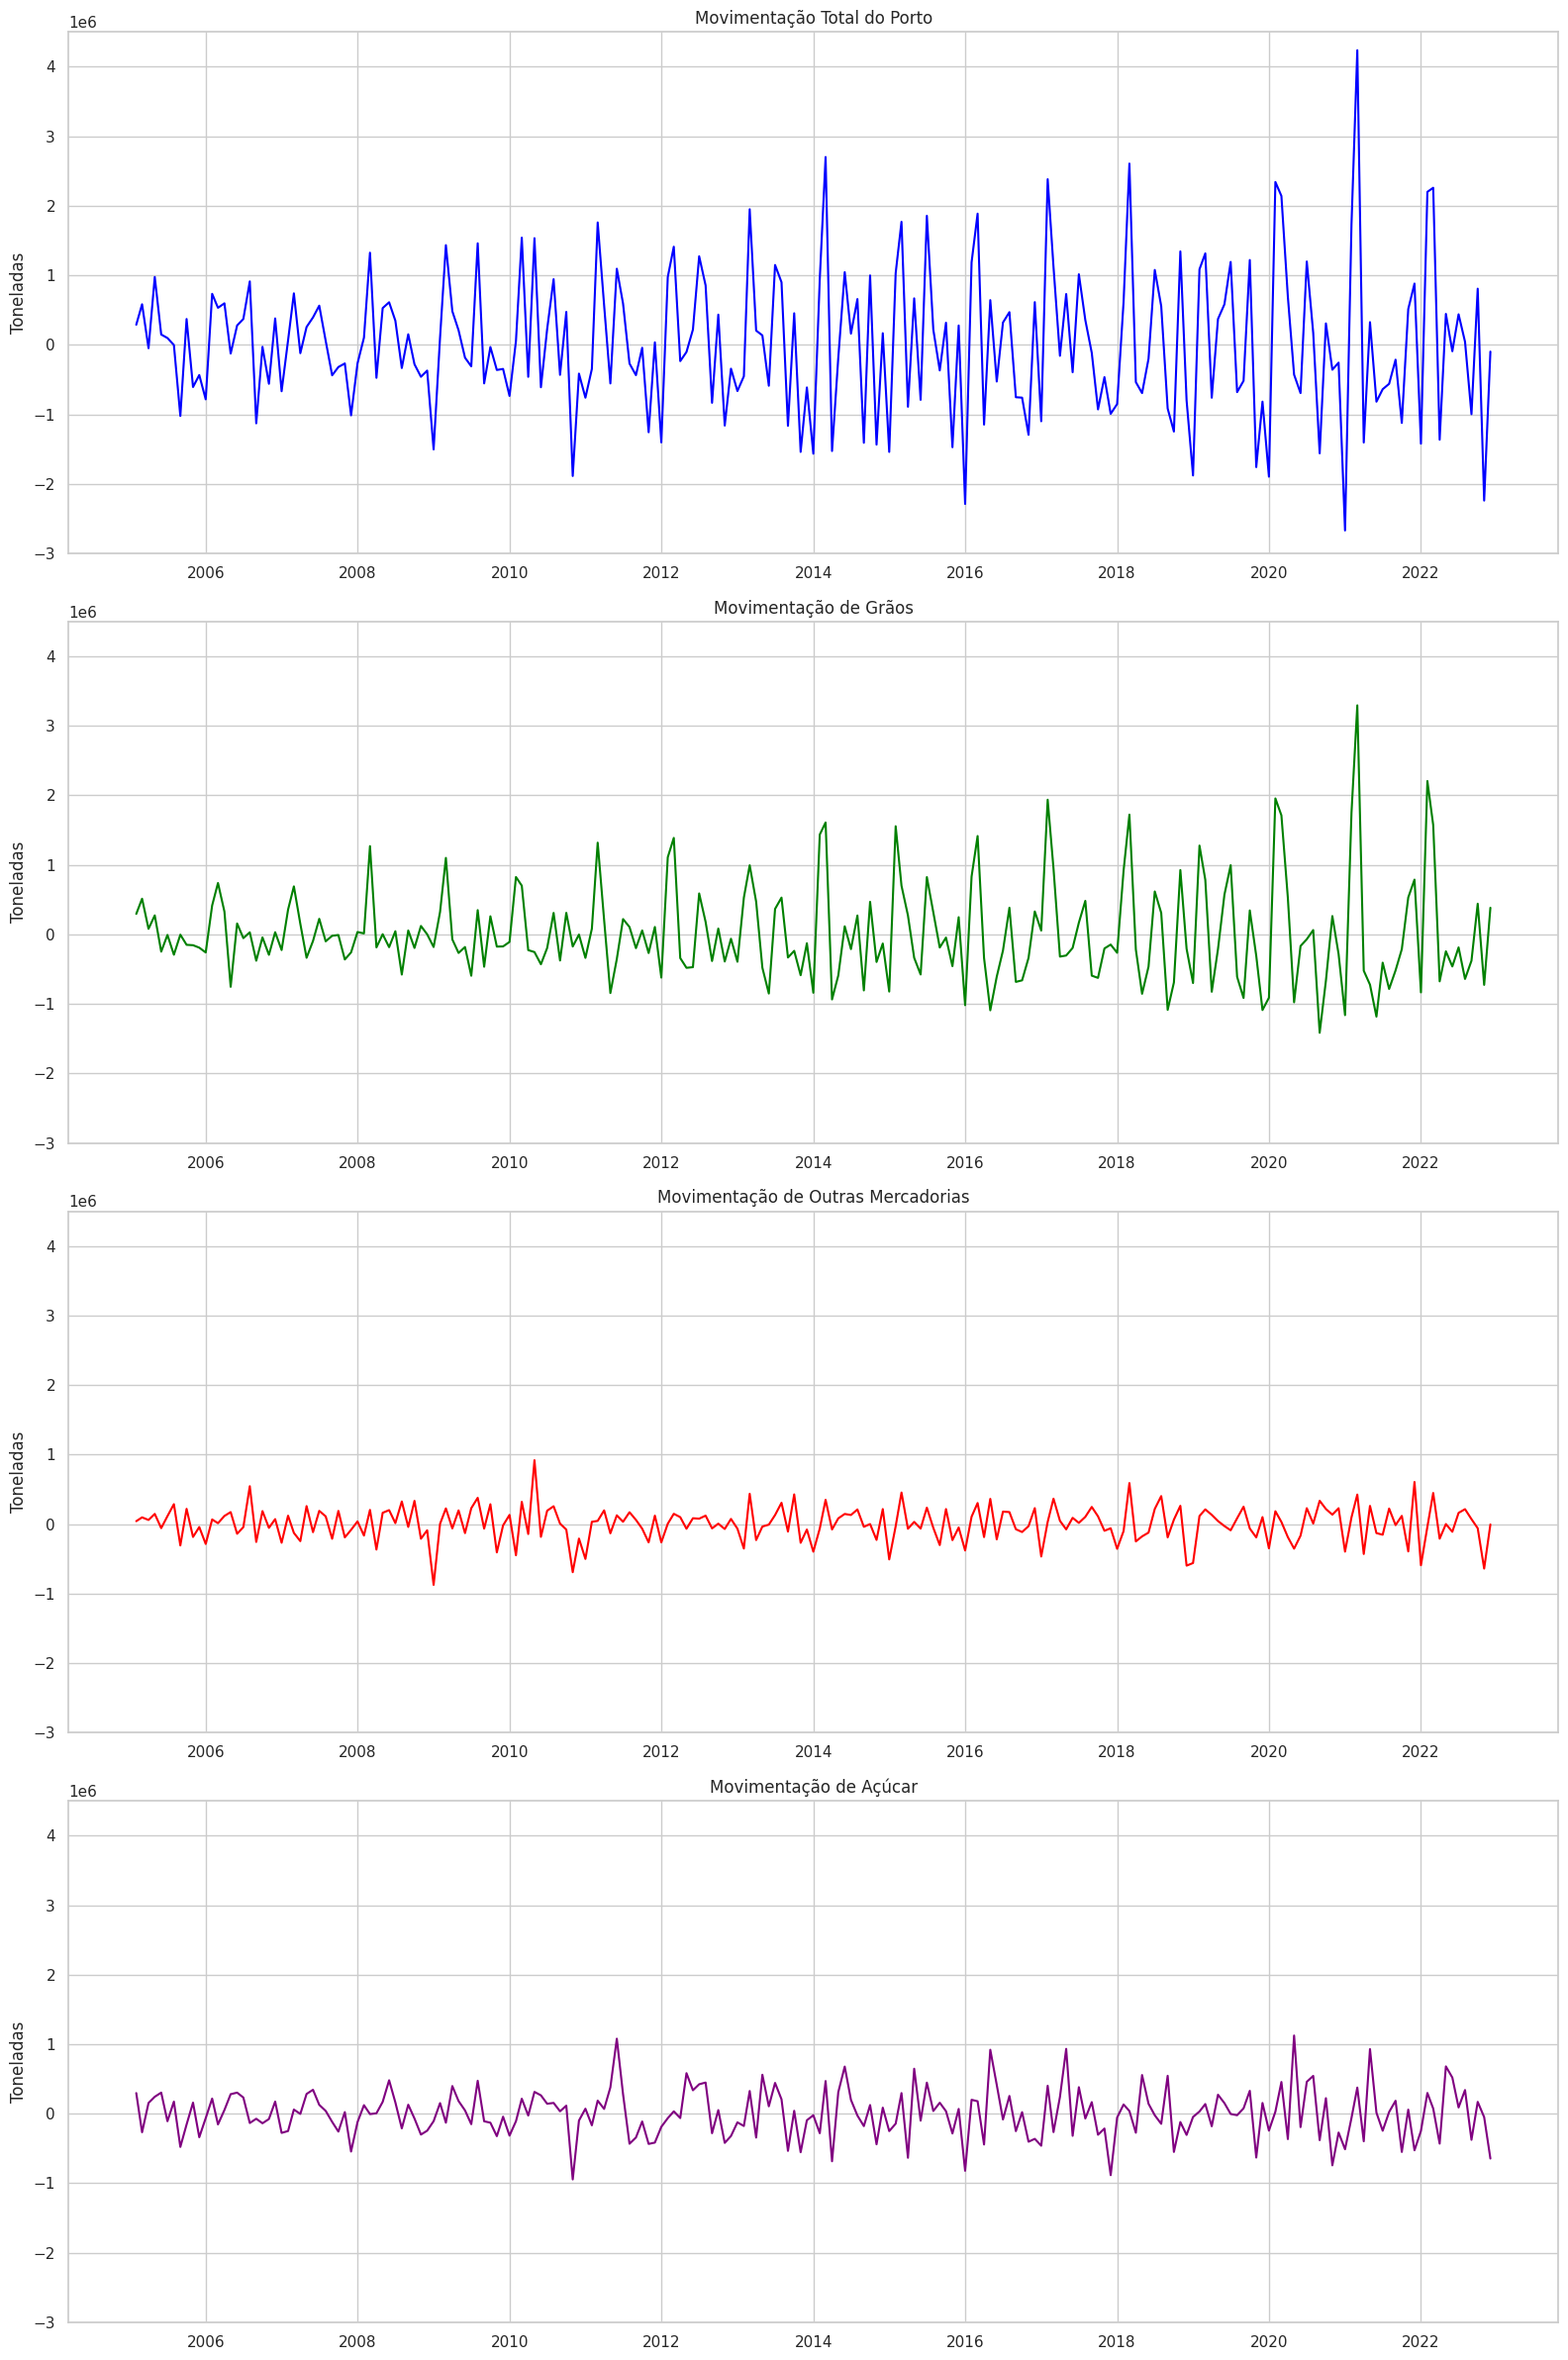

In [167]:
# Definir a escala desejada para o eixo y
y_scale = (-3000000, 4500000)

# Plotar cada variável em relação ao índice (data)
fig, axs = plt.subplots(4, 1, figsize=(16, 24))

# Movimentação Total do Porto
axs[0].plot(movimento2_df.porto.diff(1), color='blue')
axs[0].set_ylabel('Toneladas')
axs[0].set_title('Movimentação Total do Porto')
axs[0].set_ylim(y_scale)

# Movimentação de Grãos
axs[1].plot(movimento2_df.graos.diff(1), color='green')
axs[1].set_ylabel('Toneladas')
axs[1].set_title('Movimentação de Grãos')
axs[1].set_ylim(y_scale)

# Movimentação de Outras Mercadorias
axs[2].plot(movimento2_df.outras.diff(1), color='red')
axs[2].set_ylabel('Toneladas')
axs[2].set_title('Movimentação de Outras Mercadorias')
axs[2].set_ylim(y_scale)

# Movimentação de Açúcar
axs[3].plot(movimento2_df.sugar.diff(1), color='purple')
axs[3].set_ylabel('Toneladas')
axs[3].set_title('Movimentação de Açúcar')
axs[3].set_ylim(y_scale)

plt.tight_layout()
plt.show()

###Comparando a Sazonalidade Cargas x Porto

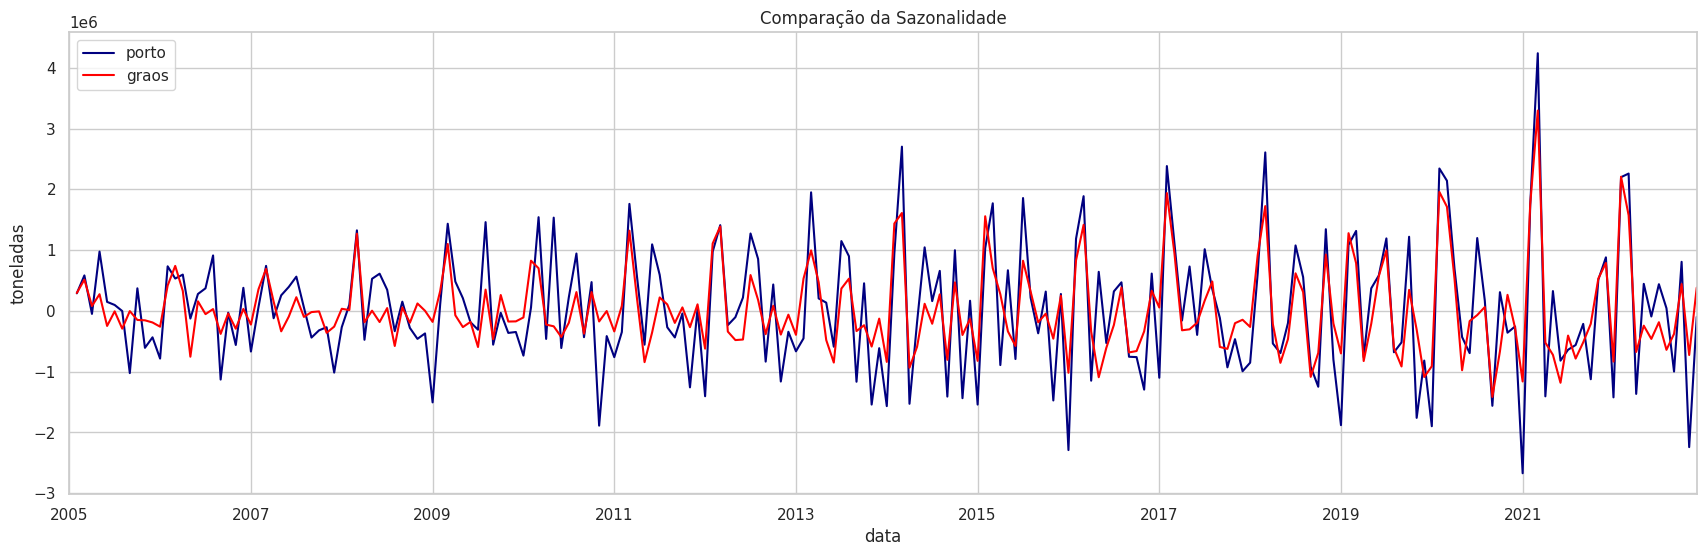

In [168]:
movimento2_df.porto.diff(1).plot(figsize=(21, 6), color='navy')
movimento2_df.graos.diff(1).plot(figsize=(21, 6), color='red')
#movimento2_df.outras.diff(1).plot(figsize=(21, 6), color='red')
#movimento2_df.sugar.diff(1).plot(figsize=(21, 6), color='red')
plt.ylabel('toneladas')
plt.title('Comparação da Sazonalidade')

plt.legend(loc='upper left')
plt.show()